<img style="float: right;" src=" QQ截图20180909002232.png" width="100%">

<img style="float: right;" src=" QQ截图20180909002232.png" width="100%">

<img style="float: right;" src="QQ截图20180909002646.png" width="100%">

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

X,y = datasets.make_moons(n_samples=500,noise=0.3,random_state=42)

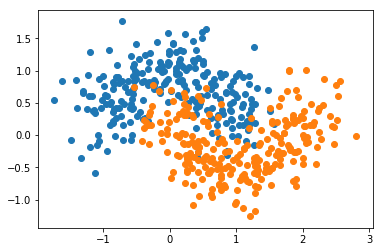

In [3]:
plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [5]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)
log_clf.score(X_test,y_test)

0.824

In [6]:
from sklearn.svm import SVC

svm_clf = SVC()
svm_clf.fit(X_train,y_train)
svm_clf.score(X_test,y_test)

0.88

In [7]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train,y_train)
dt_clf.score(X_test,y_test)

0.832

In [8]:
y_predict1 = log_clf.predict(X_test)
y_predict2 = svm_clf.predict(X_test)
y_predict3 = dt_clf.predict(X_test)

In [9]:
y_predict = np.array((y_predict1 + y_predict2 + y_predict3) >= 2, dtype='int')

In [10]:
y_predict[:10]

array([1, 1, 0, 0, 0, 1, 0, 1, 0, 1])

In [11]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_predict)

0.888

# 使用Voting Classifier

In [12]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf',LogisticRegression()),
    ('svm_clf',SVC()),
    ('dt_clf',DecisionTreeClassifier())
], voting='hard') # hard少数服从多数

In [13]:
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('log_clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('svm_clf...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [14]:
voting_clf.score(X_test,y_test)

D:\ruanjian\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.872

## 可以先把每种算法调参调到最优，再传进去vot

# 投票的权重?

In [ ]:
<img style="float: right;" src="" width="100%">

<img style="float: right;" src="QQ截图20180909005027.png" width="100%">

<img style="float: right;" src="QQ截图20180909005212.png" width="100%">

<img style="float: right;" src="QQ截图20180909005312.png" width="100%">

<img style="float: right;" src="QQ截图20180909005413.png" width="100%">

- 支持概率计算  2/3
<img style="float: right;" src="QQ截图20180909005449.png" width="100%">

In [ ]:
<img style="float: right;" src="" width="100%">

<img style="float: right;" src="QQ截图20180909005550.png" width="100%">

- 决策树，叶子节点中是有不同类数据的，叶子节点哪一种多分给哪一种，比值为概率
- SVC中有个probability参数默认为False，Treu可以计算概率

# Soft Voting

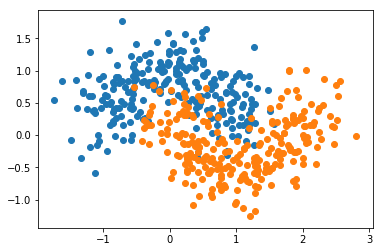

In [19]:
from sklearn import datasets

X,y = datasets.make_moons(n_samples=500,noise=0.3,random_state=42)

plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

## Hard Voting Classifier

In [21]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(estimators=[
    ('log_clf',LogisticRegression()),
    ('svm_clf',SVC()),
    ('dt_clf',DecisionTreeClassifier())
], voting='hard') # hard少数服从多数

In [22]:
voting_clf.fit(X_train,y_train)
voting_clf.score(X_test,y_test)

D:\ruanjian\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.872

## Soft Voting Classifier

In [29]:
voting_clf2 = VotingClassifier(estimators=[
    ('log_clf',LogisticRegression()),
    ('svm_clf',SVC(probability=True)),
    ('dt_clf',DecisionTreeClassifier(random_state=666))
], voting='soft') # hard少数服从多数

In [30]:
voting_clf2.fit(X_train,y_train)
voting_clf2.score(X_test,y_test)

D:\ruanjian\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0.856

In [ ]:
<img style="float: right;" src="" width="100%">

## 大数定理

<img style="float: right;" src="QQ截图20180909010530.png" width="100%">

<img style="float: right;" src="QQ截图20180909010632.png" width="100%">

<img style="float: right;" src="QQ截图20180909010703.png" width="100%">

- 每个子模型不需要太高的准确率
- 如果每个子模型只有51%的准确率
- 如果我们只有一个子模型，整体准确率：51%
- 如果我们只有3个子模型，整体准确率:

In [ ]:
<img style="float: right;" src="" width="100%">

<img style="float: right;" src="QQ截图20180909011049.png" width="100%">

<img style="float: right;" src="QQ截图20180909011340.png" width="100%">

<img style="float: right;" src="QQ截图20180909011622.png" width="100%">
- Pasting 受怎么分影响大
- 统计学中，放回取样:bootstrap

## 使用Bagging

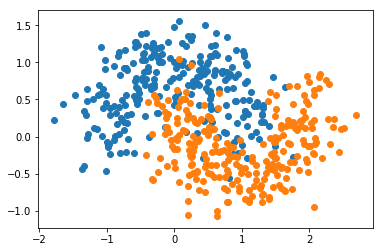

In [43]:
from sklearn import datasets

X,y = datasets.make_moons(n_samples=500,noise=0.3,random_state=40)

plt.scatter(X[y==0,0],X[y==0,1])
plt.scatter(X[y==1,0],X[y==1,1])
plt.show()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=666)

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=500, max_samples=100,
                               bootstrap=True)

In [46]:
bagging_clf.fit(X_train,y_train)
bagging_clf.score(X_test, y_test)

0.896

In [48]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

bagging_clf = BaggingClassifier(DecisionTreeClassifier(),
                               n_estimators=5000, max_samples=100,
                               bootstrap=True)

bagging_clf.fit(X_train,y_train)
bagging_clf.score(X_test, y_test)

0.888